In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_2_instances_valid_fingers.csv')

df_or = df_10_10inst.set_index(["videoname", "n_frame", "n_landmark"])[["x", "y"]].stack().reset_index()
df_or
df_or.rename(columns={"level_3": "axis", 0: "coordinate"}, inplace=True)

df_10_10inst = df_or

intersection = ['abuelo',
       'aceptar', 'adentro', 'agrupar', 'agua', 'ahora', 'ahí', 'alegría',
       'amarrar', 'ambiente', 'amigo', 'animales', 'antes', 'aprender',
       'aproximadamente', 'aquí', 'beneficio', 'bien', 'botar', 'brotar',
       'buen', 'cada uno', 'cambiar', 'carne', 'casa', 'colores', 'comer',
       'conocer', 'contento', 'continuar', 'controlar', 'crecer',
       'cuaderno', 'cuerpo', 'cuánto', 'cuántos', 'cómo', 'decir',
       'dejar', 'dentro', 'diariamente', 'dibujar', 'diferente',
       'diferentes', 'dos', 'día', 'edad', 'ejercicios', 'ella', 'ellos',
       'emoción', 'empezar', 'enojar', 'entender', 'entonces', 'escribir',
       'ese', 'familia', 'feliz', 'fortalecer', 'frijol', 'fuerte',
       'fácil', 'grasa', 'guardar', 'gustar', 'habitación', 'hacer',
       'hermano', 'hola', 'hoy', 'idea', 'importante', 'interesante',
       'ira', 'jugar', 'juntos', 'llamar', 'mal', 'ministerio',
       'más o menos', 'necesitar', 'niños', 'no', 'nombre', 'nosotros',
       'o', 'objetivo', 'paciencia', 'papá', 'pensar', 'pero', 'planta',
       'poder', 'porcentaje', 'porción', 'preguntar', 'preguntas',
       'primaria', 'primo', 'probar', 'proceso', 'profesor', 'proteína',
       'proteínas', 'que', 'quinto', 'qué', 'razón', 'recordar',
       'relación', 'salud', 'saludable', 'seco', 'seguro', 'seleccionar',
       'semana', 'sentir', 'ser', 'sexto', 'solo', 'sí', 'también',
       'tener', 'tiempo', 'todo', 'tú', 'uno', 'usar', 'ustedes', 'vaca',
       'valor', 'venir', 'ver', 'ya', 'yo', 'él']
	   
len(intersection)

df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
df_10_10inst

#SAVE IT
correct_classes = df_10_10inst[df_10_10inst["classes"].isin(intersection) ]

df_10_10inst = correct_classes

x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

['abuelo_262' 'abuelo_266' 'abuelo_30' 'aceptar_185' 'aceptar_66'
 'ahora_243' 'ahora_246' 'ahora_74' 'ahí_101' 'ahí_151' 'ahí_231'
 'alegría_254' 'alegría_289' 'ambiente_203' 'amigo_105' 'amigo_171'
 'antes_114' 'antes_248' 'antes_283' 'antes_41' 'aprender_175'
 'aprender_195' 'aprender_217' 'aprender_282' 'aquí_19' 'bien_241'
 'bien_244' 'bien_278' 'bien_39' 'cambiar_50' 'casa_256' 'casa_9'
 'controlar_176' 'controlar_178' 'crecer_136' 'cuerpo_51' 'cómo_223'
 'cómo_44' 'cómo_85' 'decir_138' 'decir_265' 'dejar_129' 'dejar_131'
 'dentro_55' 'dos_280' 'día_261' 'edad_60' 'emoción_143' 'emoción_145'
 'emoción_249' 'emoción_250' 'emoción_281' 'emoción_43' 'emoción_45'
 'emoción_93' 'enojar_102' 'enojar_107' 'enojar_124' 'entender_137'
 'entender_141' 'familia_204' 'feliz_274' 'habitación_267' 'hermano_100'
 'hermano_116' 'hermano_150' 'hermano_169' 'hola_0' 'hoy_221' 'idea_10'
 'ira_290' 'jugar_130' 'jugar_98' 'juntos_36' 'ministerio_11'
 'más o menos_61' 'necesitar_147' 'nosotros_183' 'n

In [3]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299
0,0.451338,0.187149,0.472543,0.152198,0.487261,0.153042,0.499483,0.154569,0.424764,0.150295,...,0.541816,0.631193,0.459971,0.650785,0.495556,0.650876,0.517939,0.648745,0.537843,0.646697
1,0.504347,0.227849,0.515761,0.187243,0.526263,0.187090,0.535340,0.186919,0.479179,0.184704,...,0.491336,0.696006,0.457485,0.709453,0.495792,0.718200,0.492674,0.716951,0.479803,0.713532
2,0.528134,0.217040,0.555099,0.187347,0.572950,0.188787,0.588464,0.190798,0.508751,0.182878,...,0.444307,0.581099,0.343946,0.635067,0.358274,0.599841,0.368297,0.576580,0.377824,0.558680
3,0.472934,0.213904,0.503864,0.172804,0.521181,0.170798,0.538423,0.169588,0.451923,0.178839,...,0.370714,0.441884,0.398428,0.448739,0.399006,0.455128,0.385619,0.462124,0.376459,0.465404
4,0.482780,0.184060,0.494463,0.152365,0.503126,0.153298,0.514140,0.153892,0.456795,0.149905,...,0.470907,0.527347,0.380529,0.533886,0.410176,0.537095,0.430455,0.540792,0.447406,0.544144


In [4]:
temp_10_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27',
 'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466',
 'bien_147','bien_174','bien_230','bien_241','bien_244','bien_269',
 'bien_278','bien_329','bien_337','bien_416','comer_146','comer_164',
 'comer_313','comer_477','comer_484','comer_489','comer_705','comer_743',
 'comer_779','comer_86','cuánto_405','cuánto_420','cuánto_445',
 'cuánto_448','cuánto_456','cuánto_483','cuánto_706','cuánto_708',
 'cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_223','cómo_230',
 'cómo_387','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','decir_101',
 'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433',
 'decir_528','decir_755','decir_789','dentro_369','dentro_457',
 'dentro_486','dentro_55','dentro_566','dentro_596','dentro_603',
 'dentro_627','dentro_692','dentro_73','emoción_143','emoción_145',
 'emoción_249','emoción_272','emoción_281','emoción_43','emoción_45',
 'emoción_54','emoción_71','emoción_81','ese_100','ese_143','ese_214',
 'ese_385','ese_544','ese_608','ese_638','ese_642','ese_697','ese_719',
 'fuerte_152','fuerte_153','fuerte_240','fuerte_314','fuerte_361',
 'fuerte_362','fuerte_363','fuerte_571','fuerte_584','fuerte_588',
 'pensar_213','pensar_339','pensar_378','pensar_61','pensar_613',
 'pensar_623','pensar_66','pensar_761','pensar_771','pensar_97',
 'sentir_14','sentir_149','sentir_16','sentir_187','sentir_38',
 'sentir_458','sentir_570','sentir_591','sentir_604','sentir_89','sí_200',
 'sí_228','sí_240','sí_251','sí_277','sí_315','sí_37','sí_657','sí_659',
 'sí_76','tú_154','tú_176','tú_263','tú_277','tú_53','tú_635','tú_639',
 'tú_711','tú_778','tú_96','yo_113','yo_121','yo_123','yo_125','yo_152',
 'yo_164','yo_193','yo_235','yo_237','yo_3'],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst

ValueError: Length of values (150) does not match length of index (412)

In [ ]:
 # Number of instances
temp_10_10inst['instance'].nunique()

150

In [ ]:
# Number of classes
temp_10_10inst['classes'].nunique()

15

In [ ]:
dataset_10_10inst = temp_10_10inst.iloc[:,1:1503]
dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,classes
0,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,0.529510,...,0.588091,0.613941,0.610420,0.602892,0.595942,0.616404,0.611680,0.605222,0.598328,aprender
1,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
2,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,0.531288,...,0.614951,0.590632,0.606269,0.613335,0.619953,0.593536,0.605816,0.612867,0.619265,aprender
3,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,0.565821,...,0.346725,0.340982,0.325849,0.341897,0.357955,0.358624,0.344614,0.354449,0.365527,aprender
4,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916,aprender


In [ ]:
print(pd.unique(dataset_10_10inst['classes']))

X_10_10inst_v2= dataset_10_10inst.iloc[:,:-1].values
y_10_10inst_v2=  dataset_10_10inst.iloc[:,-1].values


Labelencoder_Y = LabelEncoder()
y_10_10inst_v2= Labelencoder_Y.fit_transform(y_10_10inst_v2)
y_10_10inst_v2

X_train_10_10inst_v2, X_test_10_10inst_v2, y_train_10_10inst_v2, y_test_10_10inst_v2 = train_test_split(X_10_10inst_v2, y_10_10inst_v2, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_10_10inst_v2 = scaler.fit_transform(X_train_10_10inst_v2)
X_test_10_10inst_v2 = scaler.transform(X_test_10_10inst_v2)

['aprender' 'bien' 'comer' 'cuánto' 'cómo' 'decir' 'dentro' 'emoción'
 'ese' 'fuerte' 'pensar' 'sentir' 'sí' 'tú' 'yo']


([<matplotlib.axis.XTick at 0x241b5364fc8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

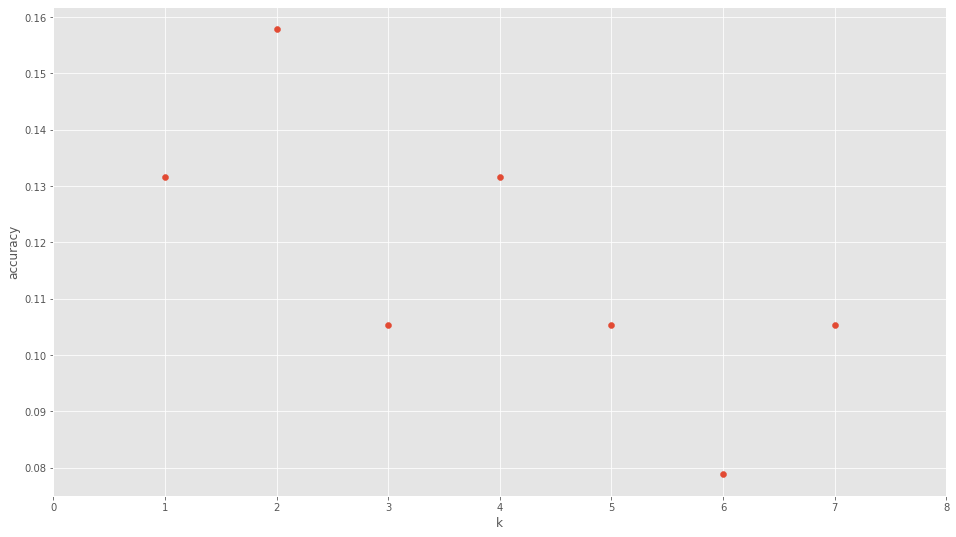

In [ ]:
k_range_10_10inst_v2 = range(1, 8)
scores_10_10inst_v2 = []
for k in k_range_10_10inst_v2:
    knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors = k)
    knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
    scores_10_10inst_v2.append(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_10_10inst_v2, scores_10_10inst_v2)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.13


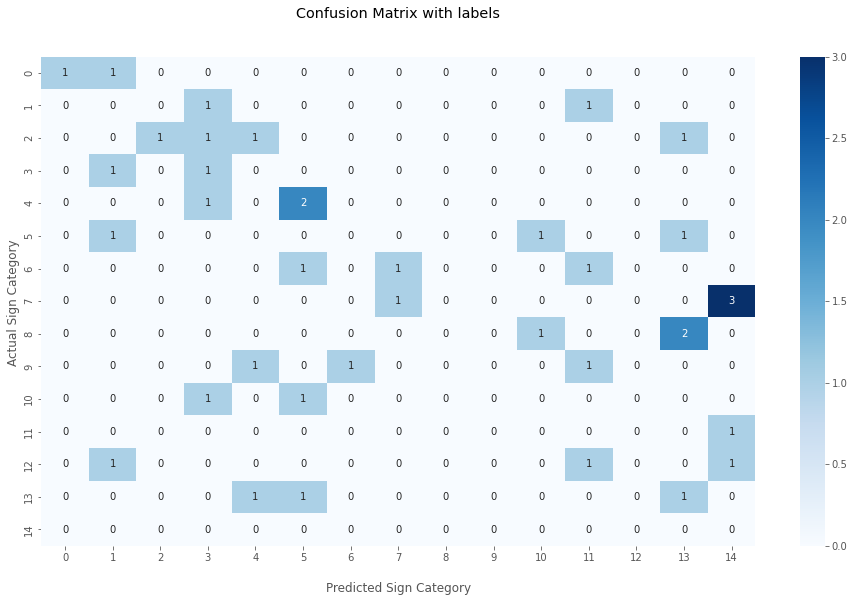

In [ ]:
n_neighbors_10_10inst_v2 = 1
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.16


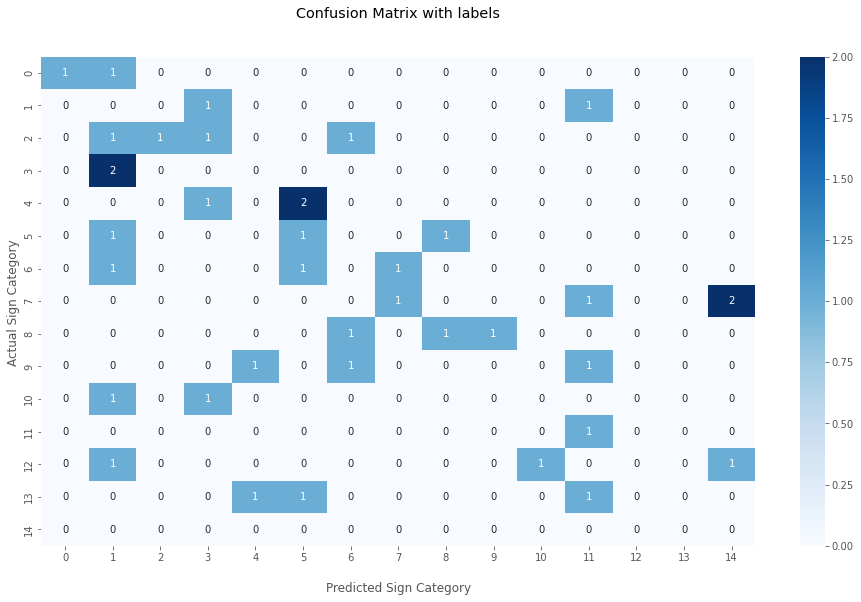

In [ ]:
n_neighbors_10_10inst_v2 = 2
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.52
Accuracy of K-NN classifier on test set: 0.11


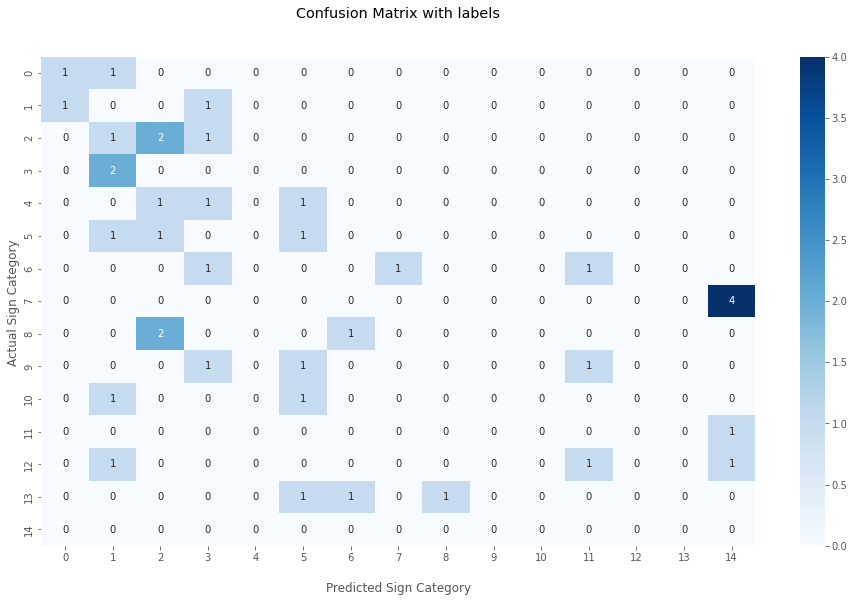

In [ ]:
n_neighbors_10_10inst_v2 = 3
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.44
Accuracy of K-NN classifier on test set: 0.11


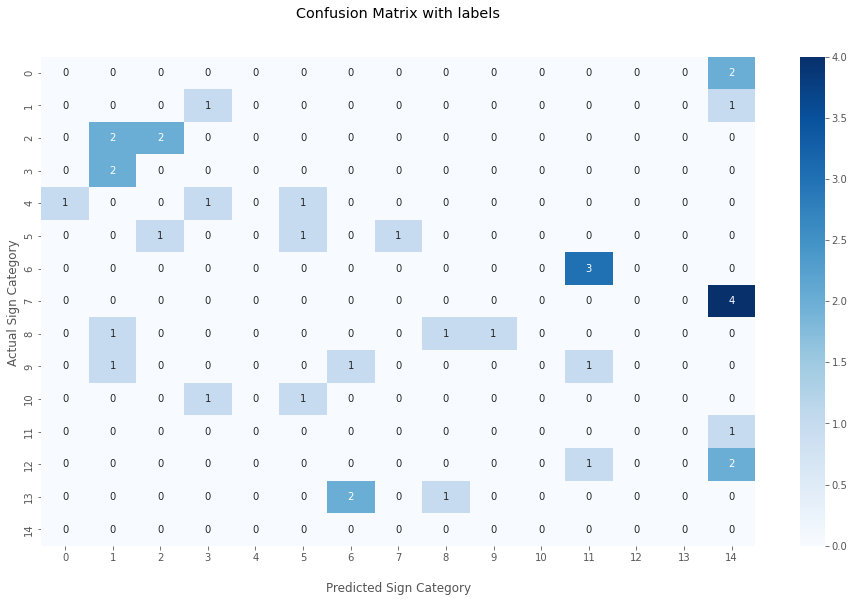

In [ ]:
n_neighbors_10_10inst_v2 = 5
 
knn_10_10inst_v2 = KNeighborsClassifier(n_neighbors_10_10inst_v2)
knn_10_10inst_v2.fit(X_train_10_10inst_v2, y_train_10_10inst_v2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_train_10_10inst_v2, y_train_10_10inst_v2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_v2.score(X_test_10_10inst_v2, y_test_10_10inst_v2)))
	 
import pandas as pd

pred_10_10inst_v2 = knn_10_10inst_v2.predict(X_test_10_10inst_v2)
cf_matrix_10_10inst_v2 = confusion_matrix(y_test_10_10inst_v2, pred_10_10inst_v2)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_v2 = sns.heatmap(cf_matrix_10_10inst_v2, annot=True, cmap='Blues')

ax_10_10inst_v2.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_v2.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_v2.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()